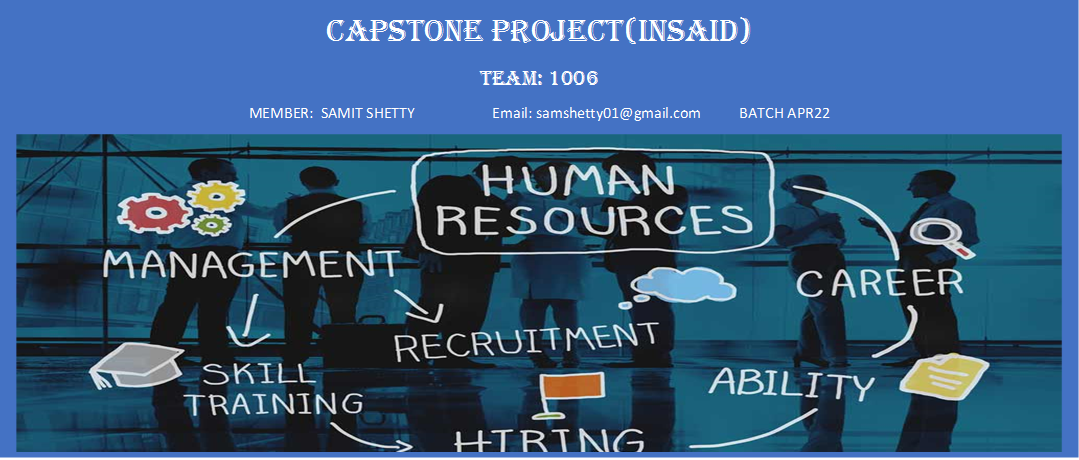

---
<a name = Section0></a>
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Handling of Redundant Data**](#Section51)
  - **5.2** [**Merging od Datasets**](#Section52)
  - **5.3** [**Handling the Missing Data**](#Section53)
  - **5.4** [**Handling of Outliers**](#Section54)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
  - **6.1** [**Correlation**](#Section61)
  - **6.2** [**Hist Plot**](#Section62)
  - **6.3** [**Categorical Features relation with status**](#Section63)
  - **6.4** [**Continuous Features relation with status**](#Section64)

**7.** [**Post Data Processing and Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)
  - **7.2** [**Encoding Categorical Features**](#Section72)
  - **7.3** [**Data Scaling**](#Section73)
  - **7.4** [**Data Preparation**](#Section74)

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Logistic Regression**](#Section81)
  - **8.2** [**Decision Tree**](#Section82)
  - **8.3** [**Random Forest**](#Section83)
  - **8.4** [**K Nearest Neighbour**](#Section84)

**9.** [**Hyper Parameter Tuning**](#Section9)<br>
  - **9.1** [**Tuned Logistic Regression**](#Section91)
  - **9.2** [**Tuned Decision Tree**](#Section92)
  - **9.3** [**Tuned Random Forest**](#Section93)
  - **9.4** [**Tuned K Nearest Neighbour**](#Section94)

**10.** [**Evaluation of Test Data**](#Section10)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

**Client Introduction**

 Our client for this project is the HR Department at a software company.

**Current Scenario**
- The Client want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.
Current Practice
- Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.


[*Go Back to Index*](#Section0)<br>

---
<a name = Section2></a>
# **2. Problem Statement**
---
**The current process suffers from the following problems:**

- 
This suffers from the following problems:

- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.


**Our Role**
- You are given datasets of past employees and their status (still employed or already left).
- Your task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. You need to build the best possible model.

**Project Deliverables**
- Deliverable: Predict whether an employee will stay or leave.
- Machine learning task: Classification
- Target variable: Status (Employed/Left)
- Win condition: N/A (best possible model)

[*Go Back to Index*](#Section0)<br>

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [231]:
pip install mysql-connector-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [232]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.utils import resample                                  # for resampling if required  
from sklearn import preprocessing
from sklearn import impute                                          # for handling missing data
from sklearn.impute import KNNImputer 

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#-------------------------------------------------------------------------------------------------------------------------------
from mysql.connector.pooling import CNX_POOL_MAXNAMESIZE
import mysql.connector
from mysql.connector import errorcode

[*Go Back to Index*](#Section0)<br>

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

# **DATASET FEATURE DESCRIPTION**

**department_data**

This dataset contains information about each department. The schema of the dataset is as follows:


| Id | Features | Description |
| :-- | :--| :--| 
|01|**dept_id**|Unique Department Code|
|02|**dept_name**|Name of the Department.|
|03|**dept_head**|Name of the Head of Department.|

**employee_details_data**

This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

| Id | Features | Description |
| :-- | :--| :--| 
|01|**employee_id**|Unique ID Number for each employe|
|02|**age**|Age of the employee.|
|03|**gender**|Gender of the employee.|
|04|**marital_status**|Marital Status of the employee.|


**employee_data**

This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

| Id | Features | Description |
| :-- | :--| :--| 
*Target variable*
|01|**Status**|Current employment status (Employed / Left) |
*Administrative information*
|02|**department**|Department to which the employees belong(ed) to|
|03|**salary**|Salary level with respect to rest of their department|
|04|**tenure**|Number of years at the company|
|05|**recently_promoted**|Was the employee promoted in the last 3 years?|
|06|**employee_id**|Unique ID Number for each employee|
*Workload information*
|07|**n_projects**|Number of projects employee has worked on|
|08|**avg_monthly_hrs**|Average number of hours worked per month|
*Mutual evaluation information*
|09|**satisfaction**|Score for employee’s satisfaction with the company (higher is better)|
|10|**last_evaluation**|Score for most recent evaluation of employee (higher is better)|
|11|**filed_complaint**|as the employee filed a formal complaint in the last 3 years?|



In [234]:
# Download the DataSets onto Python by connecting to the below provided MySQL instance.

cnx = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone2',
                              use_pure=True)
cursor = cnx.cursor()
cursor.execute("SHOW SCHEMAS")
 
for x in cursor:
  print(x)

('Capstone1',)
('Capstone2',)
('Capstone3',)
('information_schema',)
('performance_schema',)


In [235]:
cursor.execute('use Capstone2')
cursor.execute('Show tables')
for x in cursor:
    print(x)


('department_data',)
('employee_data',)
('employee_details_data',)
('model_evaluation_results',)
('model_evaluation_table',)


In [236]:
# Download department_data file & name the file dd
sql_query = pd.read_sql_query("SELECT * FROM department_data" ,cnx) 
dd = pd.DataFrame(sql_query)

In [237]:
# Download employee_details_data file & name the file ed
sql_query = pd.read_sql_query("SELECT * FROM employee_details_data",cnx) 
ed = pd.DataFrame(sql_query)

In [238]:
# Download employee_data file & name the file emd
sql_query = pd.read_sql_query("SELECT * FROM employee_data",cnx) 
emd = pd.DataFrame(sql_query)

In [239]:
sql_query = pd.read_sql_query("SELECT * FROM model_evaluation_results" ,cnx) 
me_result = pd.DataFrame(sql_query)

In [240]:
sql_query = pd.read_sql_query("SELECT * FROM model_evaluation_table" ,cnx) 
me_table = pd.DataFrame(sql_query)

In [241]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [242]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [243]:
emd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [244]:
me_result.head()

,group_id,threshold,accuracy_score,precision_score,recall,harmonic_mean
0,1016,0.70000,94,0.93000,0.87000,0.90000
1,1016,0.50000,95,0.93000,0.90000,0.91000
2,1001,0.70000,91,0.96000,0.73000,0.83000
3,1001,0.50000,93,0.96000,0.80000,0.87000
4,1012,0.70000,88,0.95000,0.63000,0.76000


[*Go Back to Index*](#Section0)<br>

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Handling of Redundant Data**

- In this section, we will identify redundant data i.e duplicates and check the proportion of it and take appropriate measures.

In [245]:
emd.shape

(14150, 11)

In [246]:
emd.duplicated().value_counts()

False    14121
True        29
dtype: int64

In [247]:
(29/14150)*100

0.2049469964664311

In [248]:
emd.drop_duplicates(inplace=True)

In [249]:
emd.duplicated().value_counts()

False    14121
dtype: int64

##### **OBSERVATION**

- As checked initially there were 29 duplicate rows.
- Since the % of the duplicated is very low i.e 0.2%, we decided to remove the duplicates.
-After removing the dulicates the data is now reduced from 14150 rows to 14121

[*Go Back to Index*](#Section0)<br>

<a name = Section52></a>
### **5.2 Merging of Dataset**

- In this section, we will perform Operations to merge the dataset of ed and dd into emd and create a new data set emd_m.

In [250]:
# merge the file ed with emd
emd=pd.merge(left=emd, right=ed, on="employee_id", how="left")
emd.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.00000,None,NaN,0.86684,6,NaN,medium,0.13442,Left,4.00000,124467,42.00000,Female,Married
1,134.00000,None,NaN,0.55572,2,NaN,low,0.51104,Left,3.00000,112210,23.00000,Female,Unmarried
2,156.00000,D00-SS,1.00000,0.47408,2,NaN,medium,0.40510,Left,3.00000,126150,24.00000,Female,Unmarried
3,256.00000,D00-SP,NaN,0.96136,6,NaN,low,0.15297,Left,4.00000,125346,51.00000,Female,Married
4,146.00000,D00-SS,NaN,0.50735,2,NaN,medium,0.43484,Left,3.00000,113707,23.00000,Female,Unmarried


In [251]:
# Rename the department column as dept_id in emd as it is the same as dept_id in dd.
emd.rename(columns={"department":"dept_id"},inplace=True) 
emd.head()

,avg_monthly_hrs,dept_id,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.00000,None,NaN,0.86684,6,NaN,medium,0.13442,Left,4.00000,124467,42.00000,Female,Married
1,134.00000,None,NaN,0.55572,2,NaN,low,0.51104,Left,3.00000,112210,23.00000,Female,Unmarried
2,156.00000,D00-SS,1.00000,0.47408,2,NaN,medium,0.40510,Left,3.00000,126150,24.00000,Female,Unmarried
3,256.00000,D00-SP,NaN,0.96136,6,NaN,low,0.15297,Left,4.00000,125346,51.00000,Female,Married
4,146.00000,D00-SS,NaN,0.50735,2,NaN,medium,0.43484,Left,3.00000,113707,23.00000,Female,Unmarried


In [252]:
emd["dept_id"].value_counts()

D00-SS     3896
D00-ENG    2575
D00-SP     2109
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: dept_id, dtype: int64

In [253]:
# Replace -IT values with D00-IT as per observation, this can be an entry error as no such dept.exists.
emd=emd.replace("-IT","D00-IT")

In [254]:
emd["dept_id"].value_counts()

D00-SS     3896
D00-ENG    2575
D00-SP     2109
D00-IT     1359
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
D00-AD      175
D00-PR      173
D00-TP      150
Name: dept_id, dtype: int64

In [255]:
# Merge the dataset dd in emd to create new File emd_m which now includes all variables from the 3 Initial Data Sets
emd_m=pd.merge(left=emd, right=dd, on="dept_id", how="left")
emd_m.shape

(14121, 16)

In [256]:
emd_m.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,age
count,14121.00000,2041.00000,12634.00000,14121.00000,297.00000,13971.00000,13971.00000,14121.00000,14116.00000
mean,199.99993,1.00000,0.71831,3.77813,1.00000,0.62124,3.49775,112080.95779,32.89600
std,50.83242,0.00000,0.17308,1.24993,0.00000,0.25050,1.46020,8754.09797,9.97500
min,49.00000,1.00000,0.31617,1.00000,1.00000,0.04006,2.00000,0.00000,22.00000
25%,155.00000,1.00000,0.56360,3.00000,1.00000,0.45031,3.00000,105767.00000,24.00000
50%,199.00000,1.00000,0.72448,4.00000,1.00000,0.65252,3.00000,111289.00000,29.00000
75%,245.00000,1.00000,0.87133,5.00000,1.00000,0.82480,4.00000,116654.00000,41.00000
max,310.00000,1.00000,1.00000,7.00000,1.00000,1.00000,10.00000,148988.00000,57.00000


In [257]:
emd_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14121 entries, 0 to 14120
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14121 non-null  float64
 1   dept_id            13414 non-null  object 
 2   filed_complaint    2041 non-null   float64
 3   last_evaluation    12634 non-null  float64
 4   n_projects         14121 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14121 non-null  object 
 7   satisfaction       13971 non-null  float64
 8   status             14121 non-null  object 
 9   tenure             13971 non-null  float64
 10  employee_id        14121 non-null  int64  
 11  age                14116 non-null  float64
 12  gender             14116 non-null  object 
 13  marital_status     14116 non-null  object 
 14  dept_name          13414 non-null  object 
 15  dept_head          13414 non-null  object 
dtypes: float64(7), int64(2

**Observation & Comments:**

- First we merged ed in emd.
- In Order to merge dd into emd, we first need the key columns same, hence we changed the column department in emd to "dept_id"
-Further after checking the uniique Values in dept_id, there was "-IT", which we replaced with "D00-IT
-Finally merged dd in emd and created new dara set emd_m



[*Go Back to Index*](#Section0)<br>

<a name = Section53></a>
### **5.3 Handling of MIssing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [258]:
100*(emd_m.shape[0] - emd_m.count())/emd_m.shape[0]

avg_monthly_hrs      0.00000
dept_id              5.00673
filed_complaint     85.54635
last_evaluation     10.53042
n_projects           0.00000
recently_promoted   97.89675
salary               0.00000
satisfaction         1.06225
status               0.00000
tenure               1.06225
employee_id          0.00000
age                  0.03541
gender               0.03541
marital_status       0.03541
dept_name            5.00673
dept_head            5.00673
dtype: float64

**Observation:**

We will use two Options for handling the missing data

Option 1: we will use KNNimputer for handling the missing data.

Option 2: we will use seperate actions for individual columns for handling the data

-1   dept_id : -5% null values, to be changed  
-2   filed_complaint: Null Values to be changed to 0, since these are 0 complaints
- 3   last_evaluation: 10.5% null values to be changed to Avg, Since these may not be evaluated, possibility where evaluation is due     
- 5   recently_promoted: 13853(97%) null values to be changed to 0 as the value for promoted is 1
- 7   satisfaction: 150(1%) null Values to be changed to Avg
- 9   tenure: 150(1%), Since null Values are same as satisfaction, most likely these are new employees whose data is not updated, min tenure is 2, hence for these 150 we will consider 1 which is less than 2  
- 11  age: 5 Null Values to be changed to Average
- 12  gender: 5 Null Values to be changed to Average
- 13  marital_status:5 Null Values to be changed to Average 
- 14  dept_name: 707(5%), are without deppartment_name, ID
- 15  dept_head: If the employees are same, it is better to value for these emplpoyees with no Dept or "bench", also check the difference with dept ID, whereever Dept ID is there allot Dept_name and dept_head accordingly       
 




 **OPTION 1**

FOR KNN imputer we will have to first cover the columns with d type object to numeric , which can be done by using label_encoder

In [259]:
emd_m.columns

Index(['avg_monthly_hrs', 'dept_id', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'dept_name',
       'dept_head'],
      dtype='object')

le = preprocessing.LabelEncoder()
emd_m=emd_m[['avg_monthly_hrs', 'dept_id', 'filed_complaint', 'last_evaluation','n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'dept_name','dept_head']].apply(le.fit_transform)


imputer=KNNImputer(n_neighbors=2)
imputer.fit_transform(emd_m)
emd_m.head()

 **OPTION 2**

In [260]:
# Create Dataset d with Na in dept head, then take count of head and dept name, if the value of subtraction is 0 then the na are in same row.
d=emd_m[emd_m['dept_name'].isna()] 
d1,d2=d['dept_name'].isna().count(), d['dept_head'].isna().count()
print("If 0 then same employees have Null values in Department Name & Head:", "Value={}".format(d1-d2))
d3=d['dept_id'].value_counts()
print(d3)

If 0 then same employees have Null values in Department Name & Head: Value=0
Series([], Name: dept_id, dtype: int64)


In [261]:
#emd_m['dept_name'].mask(emd_m['dept_id']=='D00-IT' ,'IT', inplace=True)
#emd_m['dept_head'].mask(emd_m['dept_id']=='D00-IT' ,'Henry Adey', inplace=True)
emd_m.fillna({'dept_id':'D00-BN', 'dept_name':'Bench','dept_head':'Not Alloted'}, inplace=True)



In [262]:
s=emd_m[emd_m['satisfaction'].isna()] 
s1,s2=s['satisfaction'].isna().count(), s['tenure'].isna().count()
print("If 0 then same employees have Null values in Department Name & Head:", "Value={}".format(s1-s2))

If 0 then same employees have Null values in Department Name & Head: Value=0


In [263]:
emd_m.columns

Index(['avg_monthly_hrs', 'dept_id', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'dept_name',
       'dept_head'],
      dtype='object')

In [264]:
emd_m[['filed_complaint','recently_promoted']] = emd_m[['filed_complaint','recently_promoted']].fillna(0)


In [265]:
avg_col=['last_evaluation','satisfaction', 'age']
emd_m[avg_col] = emd_m[avg_col].fillna(emd_m[avg_col].mean())
emd_m['gender'] = emd_m['gender'].fillna(emd_m['gender'].mode()[0])
emd_m['marital_status'] = emd_m['marital_status'].fillna(emd_m['marital_status'].mode()[0])
emd_m['tenure'] = emd_m['tenure'].fillna(1)


In [266]:
100*(emd_m.shape[0] - emd_m.count())/emd_m.shape[0]

avg_monthly_hrs     0.00000
dept_id             0.00000
filed_complaint     0.00000
last_evaluation     0.00000
n_projects          0.00000
recently_promoted   0.00000
salary              0.00000
satisfaction        0.00000
status              0.00000
tenure              0.00000
employee_id         0.00000
age                 0.00000
gender              0.00000
marital_status      0.00000
dept_name           0.00000
dept_head           0.00000
dtype: float64

In [267]:
emd_m['status'].value_counts()

Employed    10763
Left         3358
Name: status, dtype: int64

In [268]:
(3358/14121)*100

23.780185539267755

**Observation:**

- There are no missing Values

- There are no duplicates

- We have checked the data using describe and unique for any inconsistencies our Outliers and have not found any considerable inconsistencies or outliers.

-Also the data of dependent variable is for Left is 24% against total, though there is an imbalance it is not highly imbalanced. hence data balancing may not be required.

The Data is clear and good for ** EDA**


[*Go Back to Index*](#Section0)<br>

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---
In this section we will check the following.

- Correlation between the features
- The histogram for nunerical variables.
- The count plot for categorical features along with the relation with status
- the distribution plt for continuous features along with the relation with status

<a name = Section61></a>
### **6.1 Correlation Matrix**


Text(0.5, 1.0, 'Correlation between features')

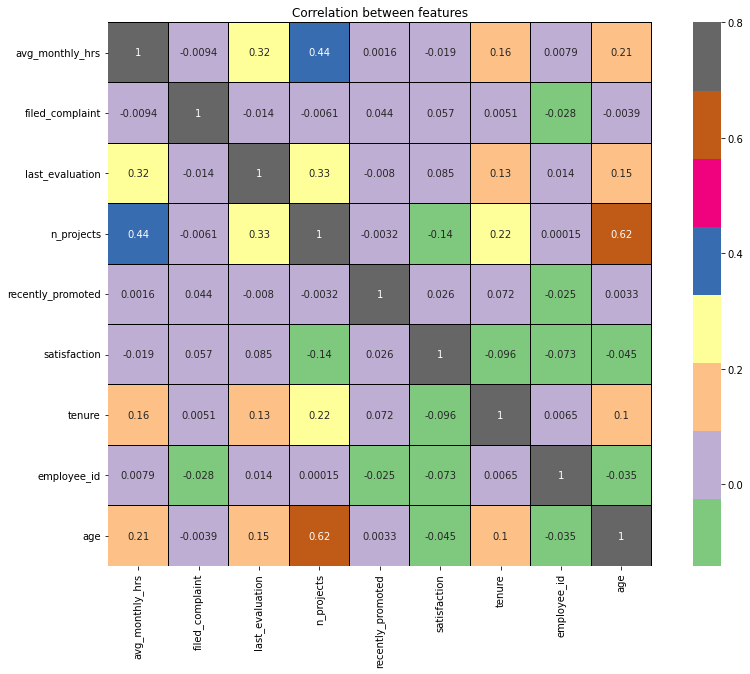

In [269]:
corr = emd_m.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='Accent',linecolor ='black')
plt.title('Correlation between features')

<a name = Section62></a>
### **6.2 Hist Plot**


**HISTOGRAM**

We will be plotting the Histogram of the Variables which would provide us insigth

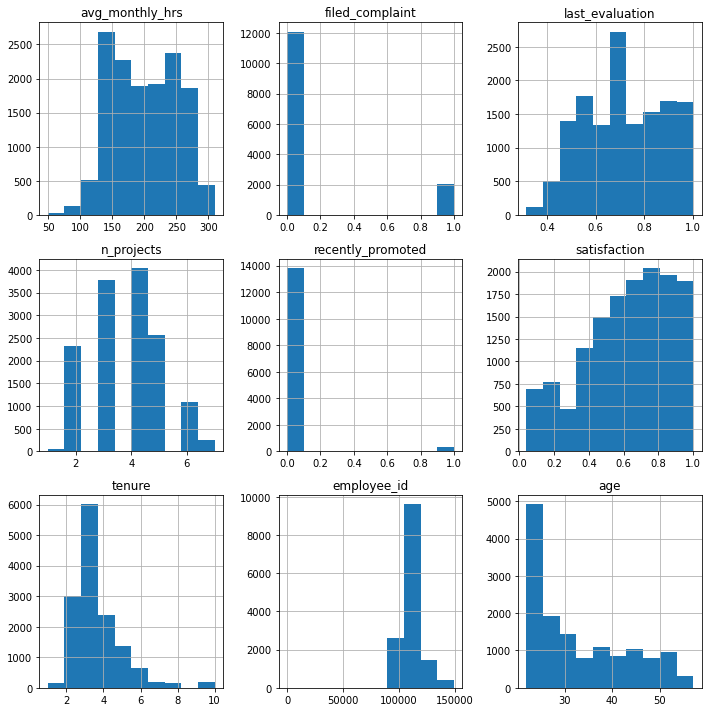

In [270]:
emd_m.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

<a name = Section63></a>
### **6.3 Categorical Features relation with status**

Here we will be plotting the count plot for categorical features to understand the relation with status


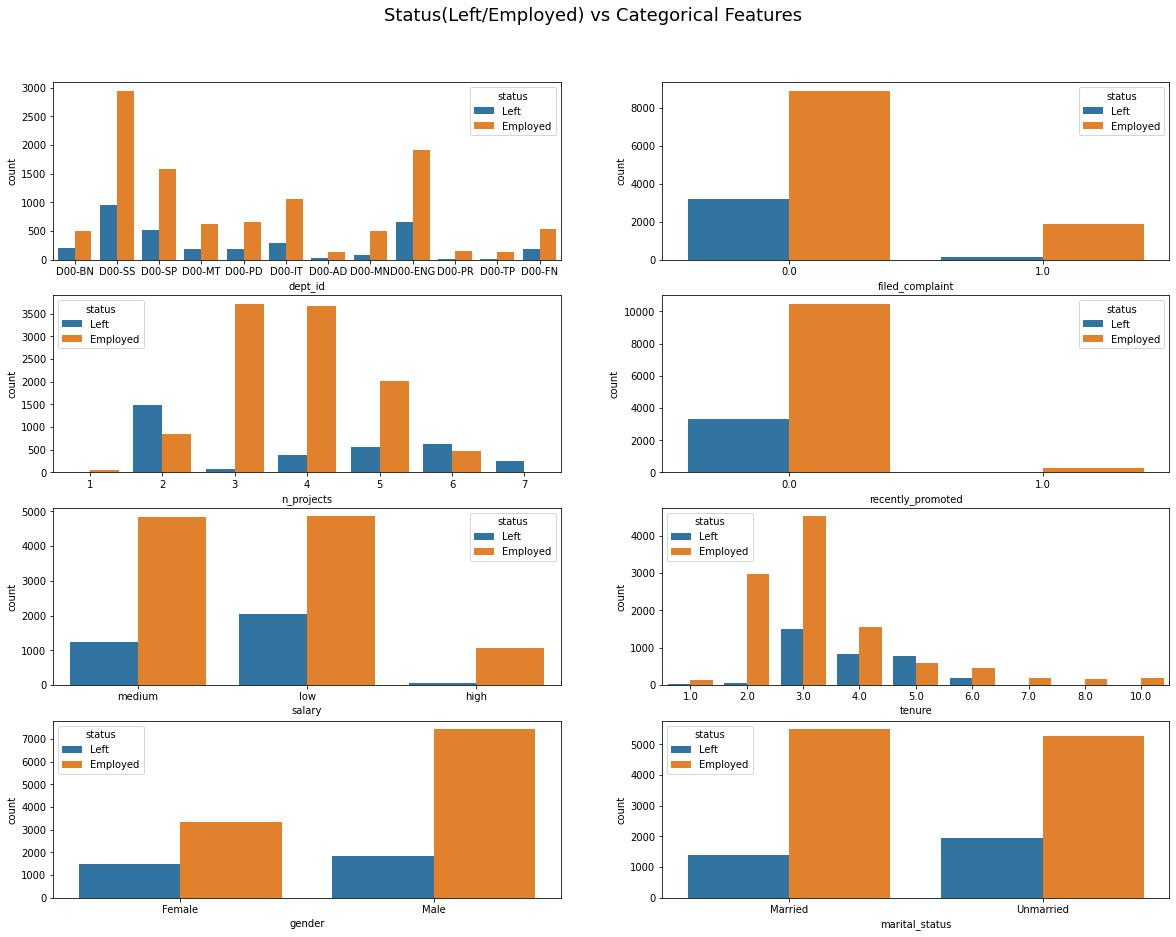

In [271]:
figure, axes=plt.subplots (4,2, figsize=(20,15))
figure.suptitle("Status(Left/Employed) vs Categorical Features", fontsize=18, y=0.95)

sns.countplot(x ='dept_id', hue = "status", data = emd_m, ax=axes[0,0])
sns.countplot(x ='filed_complaint', hue = "status", data = emd_m, ax=axes[0,1])
sns.countplot(x ='n_projects', hue = "status", data = emd_m, ax=axes[1,0])
sns.countplot(x ='recently_promoted', hue = "status", data = emd_m, ax=axes[1,1])
sns.countplot(x ='salary', hue = "status", data = emd_m, ax=axes[2,0])
sns.countplot(x ='tenure', hue = "status", data = emd_m, ax=axes[2,1])
sns.countplot(x ='gender', hue = "status", data = emd_m, ax=axes[3,0])
sns.countplot(x ='marital_status', hue = "status", data = emd_m, ax=axes[3,1])




<a name = Section64></a>
### **6.4 Continous Features relation with status**

Here we will be plotting the hist plot for categorical features to understand the relation with status


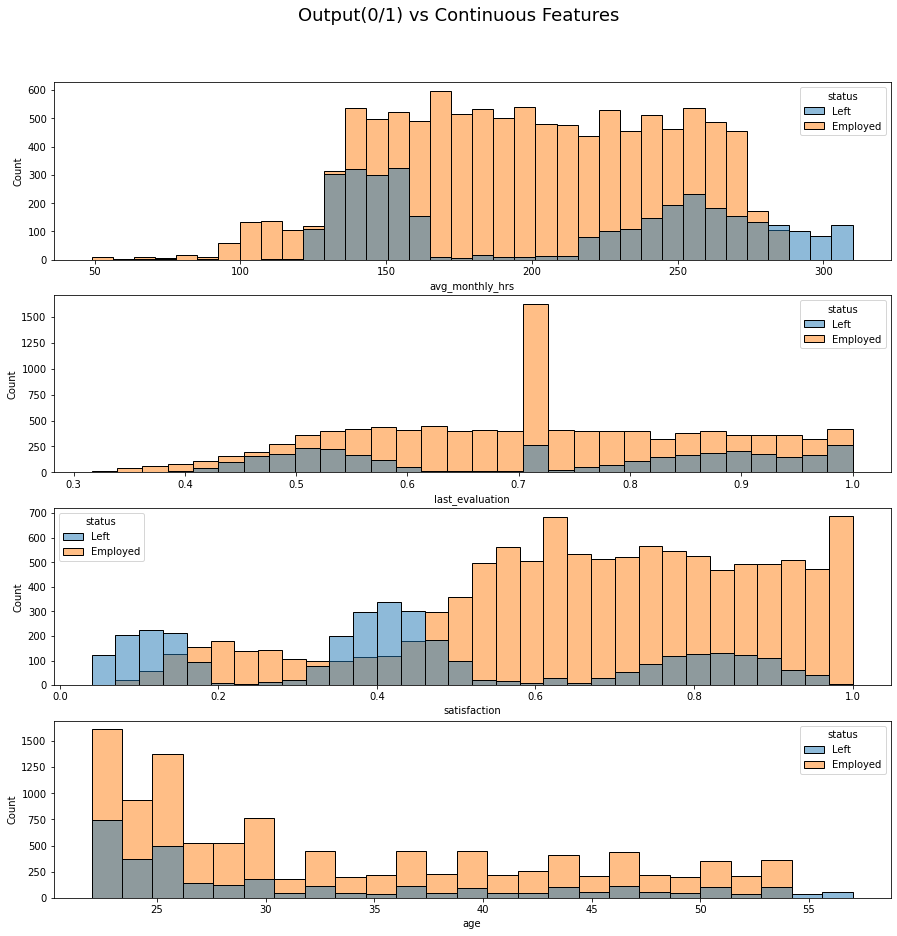

In [272]:
figure, axes=plt.subplots (4,1, figsize=(15,15))
figure.suptitle("Output(0/1) vs Continuous Features", fontsize=18, y=0.95)

sns.histplot(x ='avg_monthly_hrs', hue = "status", data = emd_m, ax=axes[0])
sns.histplot(x ='last_evaluation', hue = "status", data = emd_m, ax=axes[1])
sns.histplot(x ='satisfaction', hue = "status", data = emd_m, ax=axes[2])
sns.histplot(x ='age', hue = "status", data = emd_m, ax=axes[3])


 Now we will check the relation of features with high correlation

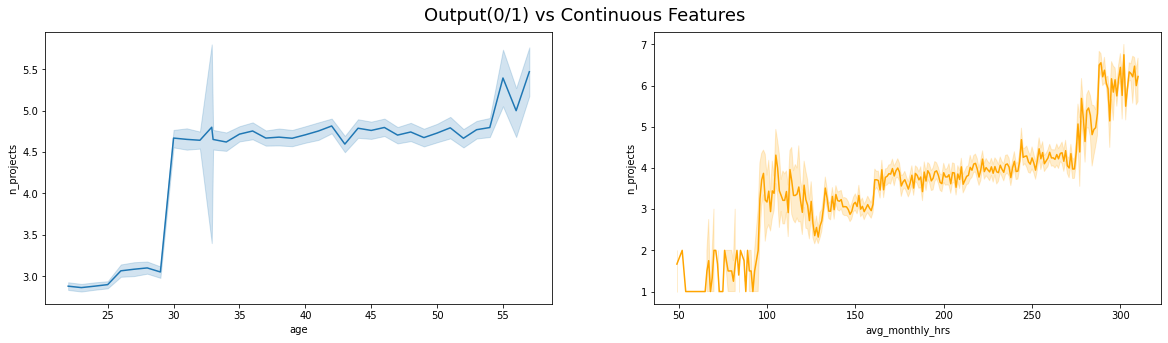

In [273]:
figure, axes=plt.subplots (1,2, figsize=(20,5))
figure.suptitle("Output(0/1) vs Continuous Features", fontsize=18, y=0.95)
sns.lineplot(x='age', y='n_projects', data=emd_m, ax=axes[0])
sns.lineplot(x='avg_monthly_hrs', y='n_projects', data=emd_m, ax=axes[1], color='Orange')


**Observation & Comments:**

- The no of people left in various departments as compared to employeed is the almost the same with no major variation.

- Left is higher with n-projects, 2, 6 & 7

- The % of people leaving with high Salary is low

- Higher the tenure, lower rate of attrition, >6 the no. of left is negligible

- No of employees left is very high for avg_monthly_hrs more than 250, also for the range from 125-160 is high.

- Employeess left is lowest for last_evaluation betweem 06-0.8

- **lower satisfaction** has **higher probability** of Employees **leaving**.**Most** of employees with satisafaction level **< 0.2** have **left**

- Correlation of age and N-Projects is high 0.62, as we have observed at the age 30 the N_projects increase but is almost same till 50 and then increases again, though the correlation is on higher side, but looking at the trend should not affect our prediction, hence will keep the data


[*Go Back to Index*](#Section0)<br>

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---
- We will convert the Continous Data to **Categorical Data**
- Now we will **perform encoding of the categorical columns** and **feed it** to the **LogisticRegression**.


<a name = Section71></a>
### **7.1 Feature Selection**



In [274]:
emd_m.columns

Index(['avg_monthly_hrs', 'dept_id', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id', 'age', 'gender', 'marital_status', 'dept_name',
       'dept_head'],
      dtype='object')

In [275]:
# Drop employee_id since this is unique id, also will from dept name and dept head as they are related direclty with dept_id
emd_m.drop(['employee_id','dept_name', 'dept_head'], axis=1, inplace=True)


In [46]:
emd.shape

(14121, 14)

In [47]:
emd_m.nunique()

avg_monthly_hrs        249
dept_id                 12
filed_complaint          2
last_evaluation      12189
n_projects               7
recently_promoted        2
salary                   3
satisfaction         13498
status                   2
tenure                   9
age                     37
gender                   2
marital_status           2
dtype: int64


<a name = Section72></a>
### **7.2 Encoding Features**



In [48]:
emd_m=pd.get_dummies(emd_m, columns=['dept_id','filed_complaint','n_projects','recently_promoted', 'salary', 'tenure', 'gender','marital_status'], drop_first=True)


In [49]:
#@title
#label_encoder = preprocessing.LabelEncoder()
#emd_m['status']= label_encoder.fit_transform(emd_m['status'])

In [50]:
emd_m['status']=emd_m['status'].replace("Left", 0)
emd_m['status']=emd_m['status'].replace("Employed", 1)


<a name = Section73></a>
### **7.3 Scaling**



In [51]:
from sklearn.preprocessing import StandardScaler

SSC=StandardScaler()
col=['avg_monthly_hrs','last_evaluation', 'satisfaction','age']
emd_m[col]=SSC.fit_transform(emd_m[col])



<a name = Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [52]:
X = emd_m.drop(['status'],axis=1)
y = emd_m['status']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (9884, 35) (9884,)
Testing Data Shape: (4237, 35) (4237,)


[*Go Back to Index*](#Section0)<br>

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Logistic Regression using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Accuracy**, also we will check for **Precision**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Score**.



In [196]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
   
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [197]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def conf_mat(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        cf_matrix = confusion_matrix(y_train, pred)
        ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%',cmap='Blues')
        ax.set_title( 'Confusion Matrix Train');
        ax.xaxis.set_ticklabels(['Positive','Negative'])
        ax.yaxis.set_ticklabels(['Positive','Negative'])
        plt.show()
          
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        cf_matrix = confusion_matrix(y_test, pred)
        ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Greens')
        ax.set_title( 'Confusion Matrix Test');
        ax.xaxis.set_ticklabels(['Positive','Negative'])
        ax.yaxis.set_ticklabels(['Positive','Negative'])
        plt.show()



<a name = Section81></a>
### **8.1 Logistic Regression**

- Create Logistic Regression model and evaluate the metrics

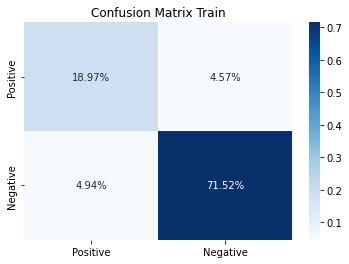

In [198]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)
lr_clf

#print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)
conf_mat(lr_clf, X_train, y_train, X_test, y_test, train=True)


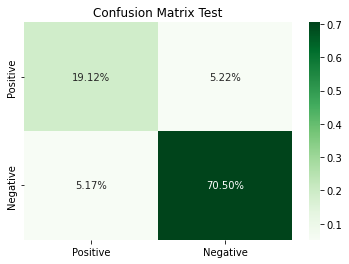

In [199]:
conf_mat(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [200]:
test_score = (accuracy_score(y_test, lr_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, lr_clf.predict(X_train)) * 100).astype(int)
test_precision = (precision_score(y_test, lr_clf.predict(X_test)) * 100).astype(int)
train_precision = (precision_score(y_train, lr_clf.predict(X_train)) * 100).astype(int)
test_recall = (recall_score(y_test, lr_clf.predict(X_test)) * 100).astype(int)
train_recall = (recall_score(y_train, lr_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, lr_clf.predict(X_test)) * 100).astype(int)
train_f1 = (f1_score(y_train, lr_clf.predict(X_train)) * 100).astype(int)

results_df = pd.DataFrame(data=[["LogisticRegression", train_score, test_score, train_precision, test_precision, train_recall,test_recall, train_f1, test_f1 ]], 
                          columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall','Test Recall','Train F1','Test F1'])

results_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,LogisticRegression,90,89,93,93,93,93,93,93



<a name = Section82></a>
### **8.2 Decision Tree**

- Create Decision Tree model and evaluate the metrics

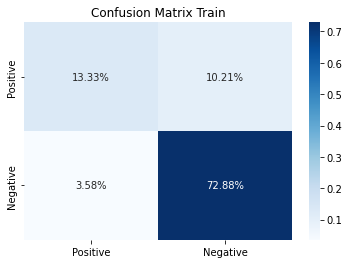

In [201]:
from sklearn.tree import DecisionTreeClassifier
dectree_clf = DecisionTreeClassifier(max_depth=2,random_state=0)
dectree_clf.fit(X_train, y_train)
dectree_clf

#print_score(dectree_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(dectree_clf, X_train, y_train, X_test, y_test, train=False)
conf_mat(dectree_clf, X_train, y_train, X_test, y_test, train=True)

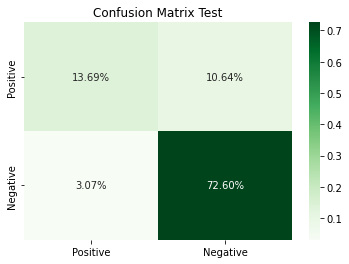

In [202]:
conf_mat(dectree_clf, X_train, y_train, X_test, y_test, train=False)

In [203]:
test_score = (accuracy_score(y_test, dectree_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, dectree_clf.predict(X_train)) * 100).astype(int)
test_precision = (precision_score(y_test, dectree_clf.predict(X_test)) * 100).astype(int)
train_precision = (precision_score(y_train, dectree_clf.predict(X_train)) * 100).astype(int)
test_recall = (recall_score(y_test, dectree_clf.predict(X_test)) * 100).astype(int)
train_recall = (recall_score(y_train, dectree_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, dectree_clf.predict(X_test)) * 100).astype(int)
train_f1 = (f1_score(y_train, dectree_clf.predict(X_train)) * 100).astype(int)

results_df2 = pd.DataFrame(data=[["Decision Tree", train_score, test_score, train_precision, test_precision, train_recall,test_recall, train_f1, test_f1 ]], 
                          columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall','Test Recall','Train F1','Test F1'])


results_df = results_df.append(results_df2, ignore_index=True)

results_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,LogisticRegression,90,89,93,93,93,93,93,93
1,Decision Tree,86,86,87,87,95,95,91,91



<a name = Section83></a>
### **8.3 Random Forest**

- Create RFC model and evaluate the metrics

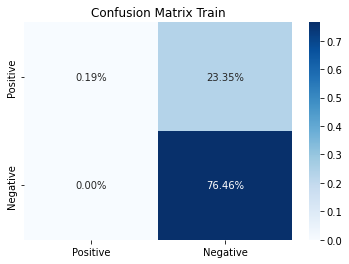

In [204]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(max_depth=2,random_state=0)
rfc_clf.fit(X_train, y_train)
rfc_clf

#print_score(rfc_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(rfc_clf, X_train, y_train, X_test, y_test, train=False)
conf_mat(rfc_clf, X_train, y_train, X_test, y_test, train=True)

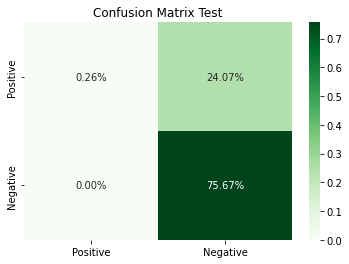

In [205]:
conf_mat(rfc_clf, X_train, y_train, X_test, y_test, train=False)

In [206]:
test_score = (accuracy_score(y_test, rfc_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, rfc_clf.predict(X_train)) * 100).astype(int)
test_precision = (precision_score(y_test, rfc_clf.predict(X_test)) * 100).astype(int)
train_precision = (precision_score(y_train, rfc_clf.predict(X_train)) * 100).astype(int)
test_recall = (recall_score(y_test, rfc_clf.predict(X_test)) * 100).astype(int)
train_recall = (recall_score(y_train, rfc_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, rfc_clf.predict(X_test)) * 100).astype(int)
train_f1 = (f1_score(y_train, rfc_clf.predict(X_train)) * 100).astype(int)

results_df2 = pd.DataFrame(data=[["Random Forest", train_score, test_score, train_precision, test_precision, train_recall,test_recall, train_f1, test_f1 ]], 
                          columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall','Test Recall','Train F1','Test F1'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,LogisticRegression,90,89,93,93,93,93,93,93
1,Decision Tree,86,86,87,87,95,95,91,91
2,Random Forest,76,75,76,75,100,100,86,86



<a name = Section84></a>
### **8.4 K Nearest Neighbour**

- Create KNN model and evaluate the metrics

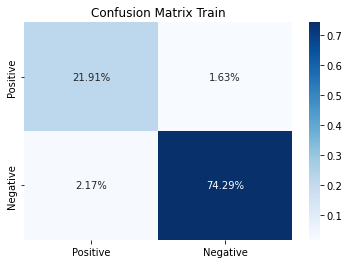

In [207]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier( )
knn_clf.fit(X_train, y_train)
knn_clf

#print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)
conf_mat(knn_clf, X_train, y_train, X_test, y_test, train=True)

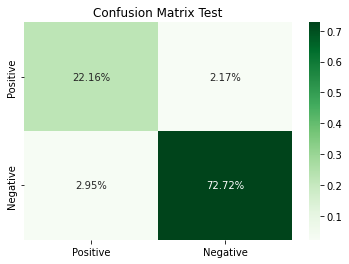

In [208]:
conf_mat(knn_clf, X_train, y_train, X_test, y_test, train=False)

In [209]:
test_score = (accuracy_score(y_test, knn_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, knn_clf.predict(X_train)) * 100).astype(int)
test_precision = (precision_score(y_test, knn_clf.predict(X_test)) * 100).astype(int)
train_precision = (precision_score(y_train, knn_clf.predict(X_train)) * 100).astype(int)
test_recall = (recall_score(y_test, knn_clf.predict(X_test)) * 100).astype(int)
train_recall = (recall_score(y_train, knn_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, knn_clf.predict(X_test)) * 100).astype(int)
train_f1 = (f1_score(y_train, knn_clf.predict(X_train)) * 100).astype(int)

results_df2 = pd.DataFrame(data=[["K-nearest", train_score, test_score, train_precision, test_precision, train_recall,test_recall, train_f1, test_f1 ]], 
                          columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall','Test Recall','Train F1','Test F1'])

results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,LogisticRegression,90,89,93,93,93,93,93,93
1,Decision Tree,86,86,87,87,95,95,91,91
2,Random Forest,76,75,76,75,100,100,86,86
3,K-nearest,96,94,97,97,97,96,97,96


[*Go Back to Index*](#Section0)<br>

<a name = Section9></a>

---
# **9. Hyper Parameter Tuning of Model & Evaluation**
---

- In this section we will use Grid Search CV for Hyper Parameter Tuning

- Fit the best Parameters to run the model and evaluate the metrics





In [210]:
from sklearn.model_selection import GridSearchCV


<a name = Section91></a>
### **9.1 Tuned Logistic Regression Model**



In [211]:
param_grid_lr= {
    "C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]
}

Best Params: {'C': 11.288378916846883, 'solver': 'liblinear'}


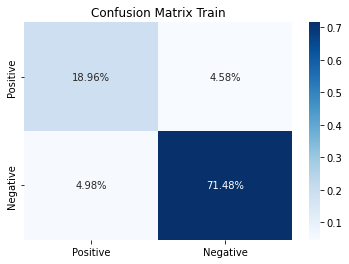

In [212]:
lr_cv=GridSearchCV(lr_clf,param_grid_lr,n_jobs=-1,cv=5)
lr_cv.fit(X_train,y_train)
best_params=lr_cv.best_params_
print(f"Best Params: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

#print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)
conf_mat(lr_clf, X_train, y_train, X_test, y_test, train=True)

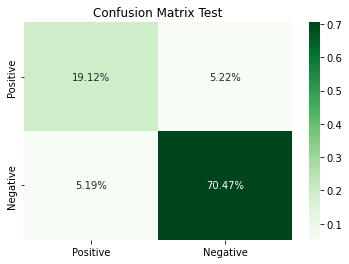

In [213]:
conf_mat(lr_clf, X_train, y_train, X_test, y_test, train=False)

In [214]:
test_score = (accuracy_score(y_test, lr_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, lr_clf.predict(X_train)) * 100).astype(int)
test_precision = (precision_score(y_test, lr_clf.predict(X_test)) * 100).astype(int)
train_precision = (precision_score(y_train, lr_clf.predict(X_train)) * 100).astype(int)
test_recall = (recall_score(y_test, lr_clf.predict(X_test)) * 100).astype(int)
train_recall = (recall_score(y_train, lr_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, lr_clf.predict(X_test)) * 100).astype(int)
train_f1 = (f1_score(y_train, lr_clf.predict(X_train)) * 100).astype(int)

tresults_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score, train_precision, test_precision, train_recall,test_recall, train_f1, test_f1 ]], 
                          columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall','Test Recall','Train F1','Test F1'])

tresults_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Tuned Logistic Regression,90,89,93,93,93,93,93,93



<a name = Section92></a>
### **9.2 Tuned Decision Tree Model**



In [215]:
param_grid_dectree = {"criterion":("gini", "entropy"),  
          "max_depth":[2, 3, 5, 10, 20], 
          "min_samples_split":[2, 3, 4, 6], 
          "min_samples_leaf":list(range(1, 20))
          }

Best Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


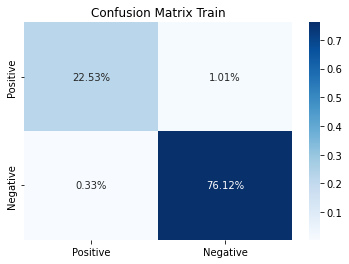

In [216]:
dectree_cv=GridSearchCV(dectree_clf,param_grid_dectree,n_jobs=-1,cv=5)
dectree_cv.fit(X_train,y_train)
best_params=dectree_cv.best_params_
print(f"Best Params: {best_params}")
dectree_clf = DecisionTreeClassifier(**best_params)

dectree_clf.fit(X_train, y_train)

#print_score(dectree_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(dectree_clf, X_train, y_train, X_test, y_test, train=False)
conf_mat(dectree_clf, X_train, y_train, X_test, y_test, train=True)

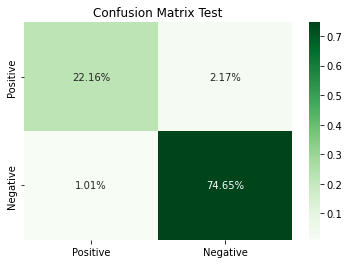

In [217]:
conf_mat(dectree_clf, X_train, y_train, X_test, y_test, train=False)

In [218]:
test_score = (accuracy_score(y_test, dectree_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, dectree_clf.predict(X_train)) * 100).astype(int)
test_precision = (precision_score(y_test, dectree_clf.predict(X_test)) * 100).astype(int)
train_precision = (precision_score(y_train, dectree_clf.predict(X_train)) * 100).astype(int)
test_recall = (recall_score(y_test, dectree_clf.predict(X_test)) * 100).astype(int)
train_recall = (recall_score(y_train, dectree_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, dectree_clf.predict(X_test)) * 100).astype(int)
train_f1 = (f1_score(y_train, dectree_clf.predict(X_train)) * 100).astype(int)

tresults_df2 = pd.DataFrame(data=[["Tuned Decision Tree", train_score, test_score, train_precision, test_precision, train_recall,test_recall, train_f1, test_f1 ]], 
                          columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall','Test Recall','Train F1','Test F1'])


tresults_df = tresults_df.append(tresults_df2, ignore_index=True)

tresults_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Tuned Logistic Regression,90,89,93,93,93,93,93,93
1,Tuned Decision Tree,98,96,98,97,99,98,99,97



<a name = Section93></a>
### **9.3 Tuned Random Forest Model**



In [219]:
param_grid_rfc = {
    'n_estimators' : [50,100],
    'max_depth' : [2,3,5,7,10],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,3,4,5], 
}

Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


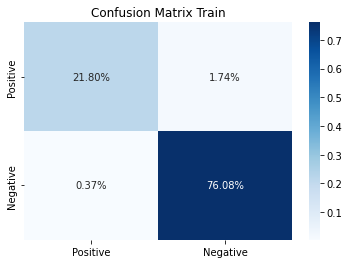

In [220]:
rfc_cv=GridSearchCV(rfc_clf,param_grid_rfc,n_jobs=-1,cv=5)
rfc_cv.fit(X_train,y_train)
best_params=rfc_cv.best_params_
print(f"Best Params: {best_params}")
rfc_clf = RandomForestClassifier(**best_params)

rfc_clf.fit(X_train, y_train)

#print_score(rfc_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(rfc_clf, X_train, y_train, X_test, y_test, train=False)
conf_mat(rfc_clf, X_train, y_train, X_test, y_test, train=True)

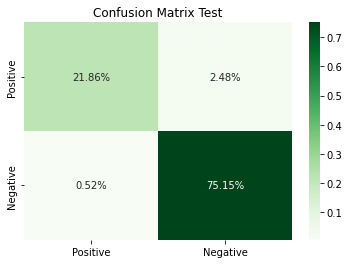

In [221]:
conf_mat(rfc_clf, X_train, y_train, X_test, y_test, train=False)

In [222]:
test_score = (accuracy_score(y_test, rfc_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, rfc_clf.predict(X_train)) * 100).astype(int)
test_precision = (precision_score(y_test, rfc_clf.predict(X_test)) * 100).astype(int)
train_precision = (precision_score(y_train, rfc_clf.predict(X_train)) * 100).astype(int)
test_recall = (recall_score(y_test, rfc_clf.predict(X_test)) * 100).astype(int)
train_recall = (recall_score(y_train, rfc_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, rfc_clf.predict(X_test)) * 100).astype(int)
train_f1 = (f1_score(y_train, rfc_clf.predict(X_train)) * 100).astype(int)

tresults_df2 = pd.DataFrame(data=[["Tuned Random Forest", train_score, test_score, train_precision, test_precision, train_recall,test_recall, train_f1, test_f1 ]], 
                          columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall','Test Recall','Train F1','Test F1'])
tresults_df = tresults_df.append(tresults_df2, ignore_index=True)
tresults_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Tuned Logistic Regression,90,89,93,93,93,93,93,93
1,Tuned Decision Tree,98,96,98,97,99,98,99,97
2,Tuned Random Forest,97,97,97,96,99,99,98,98



<a name = Section94></a>
### **9.4 Tuned K Nearest Neighbour Model**



In [223]:
param_grid_knn = {
    'n_neighbors' : list(range(1,10)),
     'weights' : ['uniform','distance'],
     'metric' : ['minkowski','euclidean','manhattan']
}

Best Params: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


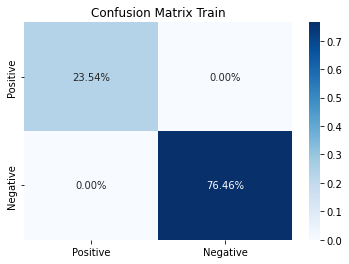

In [224]:
knn_cv=GridSearchCV(knn_clf,param_grid_knn,n_jobs=-1,cv=5)
knn_cv.fit(X_train,y_train)
best_params=knn_cv.best_params_
print(f"Best Params: {best_params}")
knn_clf = KNeighborsClassifier(**best_params)

knn_clf.fit(X_train, y_train)

#print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
#print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)
conf_mat(knn_clf, X_train, y_train, X_test, y_test, train=True)

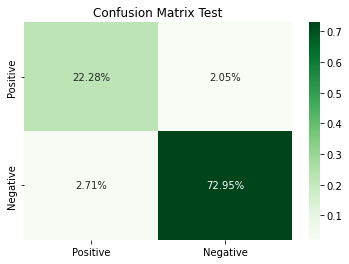

In [225]:
conf_mat(knn_clf, X_train, y_train, X_test, y_test, train=False)

In [226]:
test_score = (accuracy_score(y_test, knn_clf.predict(X_test)) * 100).astype(int)
train_score = (accuracy_score(y_train, knn_clf.predict(X_train)) * 100).astype(int)
test_precision = (precision_score(y_test, knn_clf.predict(X_test)) * 100).astype(int)
train_precision = (precision_score(y_train, knn_clf.predict(X_train)) * 100).astype(int)
test_recall = (recall_score(y_test, knn_clf.predict(X_test)) * 100).astype(int)
train_recall = (recall_score(y_train, knn_clf.predict(X_train)) * 100).astype(int)
test_f1 = (f1_score(y_test, knn_clf.predict(X_test)) * 100).astype(int)
train_f1 = (f1_score(y_train, knn_clf.predict(X_train)) * 100).astype(int)

tresults_df2 = pd.DataFrame(data=[["Tuned K Neighbours", train_score, test_score, train_precision, test_precision, train_recall,test_recall, train_f1, test_f1 ]], 
                          columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision','Train Recall','Test Recall','Train F1','Test F1'])
tresults_df = tresults_df.append(tresults_df2, ignore_index=True)
tresults_df


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Tuned Logistic Regression,90,89,93,93,93,93,93,93
1,Tuned Decision Tree,98,96,98,97,99,98,99,97
2,Tuned Random Forest,97,97,97,96,99,99,98,98
3,Tuned K Neighbours,100,95,100,97,100,96,100,96


In [227]:
results_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,LogisticRegression,90,89,93,93,93,93,93,93
1,Decision Tree,86,86,87,87,95,95,91,91
2,Random Forest,76,75,76,75,100,100,86,86
3,K-nearest,96,94,97,97,97,96,97,96


**OBSERVATION & COMMENTS**

Based on the Model Evaluation and Hyper Tuned Model Evaluation.

The Model with high Accuracy less Variance between Train Data and Test Data and high F1 Score, we should use the Tuned Random Forest Model for Evaluation Purpose.

KNN Model is also good but with Tuned Model having Train Accuracy of 100 seems to be Overfitting

[*Go Back to Index*](#Section0)<br>

<a name = Section9></a>

---
# **10. Evaluation of the Test Data**
---

- In this Section we will  import the sample data 
- Use the selected model to Predict the resuts.
- and download the results 



